In [1]:
import numpy as np
%matplotlib inline
import Corrfunc

import utils
import plotter

%load_ext autoreload
%autoreload 2

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
textsize = 'x-large'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': textsize,
         'axes.titlesize': textsize,
         'xtick.labelsize': textsize,
         'ytick.labelsize': textsize}
pylab.rcParams.update(params)

In [27]:
def plot_cf_err(rs, cf_arrs, r_true, cf_true, labels, colors, err=False):
    
    if np.array(rs).ndim == 1:
        rs = [rs]
    if np.array(cf_arrs).ndim == 2:
        cf_arrs = np.array([cf_arrs])
    
    cfs_mean = []
    error_regions = []
    for cfs in cf_arrs:
        mean = np.mean(cfs, axis=0)
        cfs_mean.append(mean)
        std = np.std(cfs, axis=0)
        error_regions.append([mean-std, mean+std])
    
    plotter.plot_cf_cont(rs, cfs_mean, r_true, cf_true, labels, colors, error_regions=error_regions, err=err)

In [49]:
def plot_continuous(cat_tag, cf_tags, Nrealizations=100, colors=None, labels=None, err=False):
    
    if not colors:
        colors = ['lime','blue', 'cyan', 'magenta', 'purple']
    if not labels:
        labels = [f"{tag.split('_')[1]}, bin width {tag.split('bw')[-1]}" for tag in cf_tags]

    cat_dir = '../catalogs'
    result_dir = '../results/results_lognormal{}'.format(cat_tag)

    rs = []
    cf_arrs = []

    for i in range(len(cf_tags)):
        xis = []
        for Nr in range(Nrealizations):
            cf_fn = '{}/cf{}{}_rlz{}.npy'.format(result_dir, cf_tags[i], cat_tag, Nr)
            r_avg, xi, label = np.load(cf_fn, allow_pickle=True)
            xis.append(xi)
        rs.append(r_avg)
        cf_arrs.append(xis)     

    # true
    true_fn = '{}/inputs/cat{}_Rh_xi.txt'.format(cat_dir, cat_tag)
    r_true, xi_true = np.loadtxt(true_fn, unpack=True)
    b1 = 1.5    
    xi_true *= b1**2

    #print(np.array(cf_arrs).shape)
    #print(xi_true.shape)
    plot_cf_err(rs, cf_arrs, r_true, xi_true, labels, colors, err=err)

    plt.xlim(min(r_avg), max(r_avg))
    plt.ylim(min(np.array(xis).flatten()), max(xi))

(2, 1000)
rmse: True
plotting


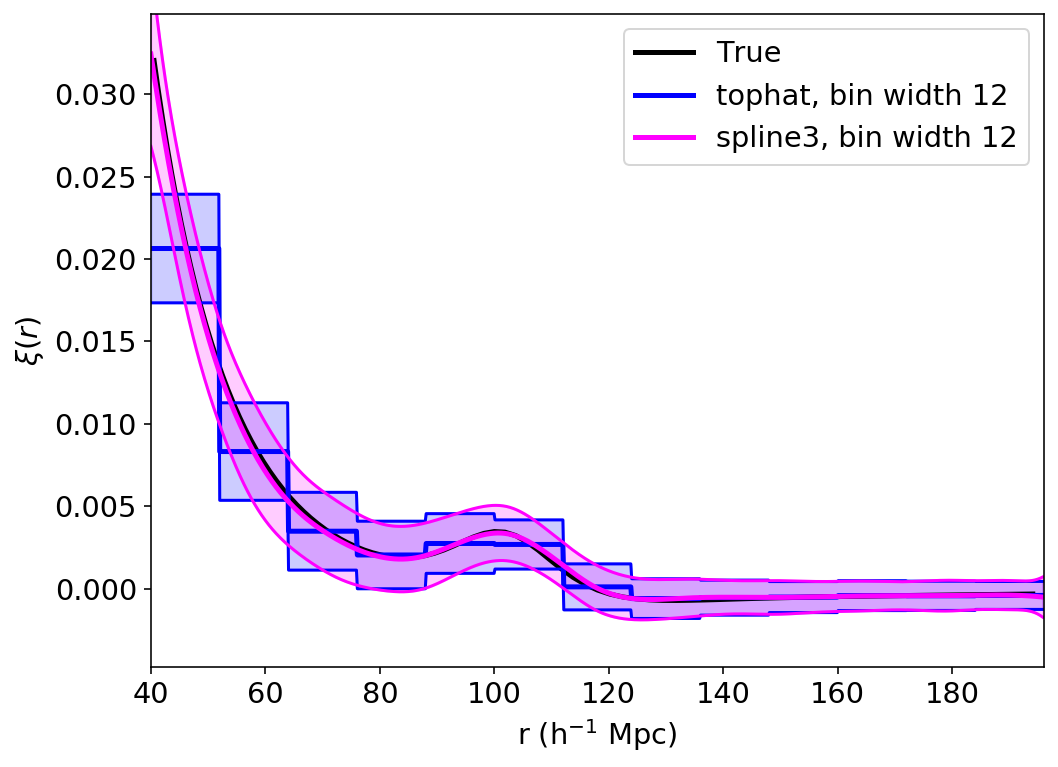

In [31]:
cat_tag = '_L750_n1e-4'
cf_tags = ['_tophat_bw12', '_spline3_bw12']
colors = ['blue', 'magenta']
plot_continuous(cat_tag, cf_tags, colors=colors)

In [54]:
cat_tag = '_L750_n3e-5'
cf_tags = ['_tophat_bw12', '_spline3_bw12']
colors = ['blue', 'magenta']
plot_continuous(cat_tag, cf_tags, colors=colors)

FileNotFoundError: [Errno 2] No such file or directory: '../results/results_lognormal_L750_n3e-5/cf_tophat_bw12_L750_n3e-5_rlz0.npy'

(2, 1000)
rmse: True
plotting


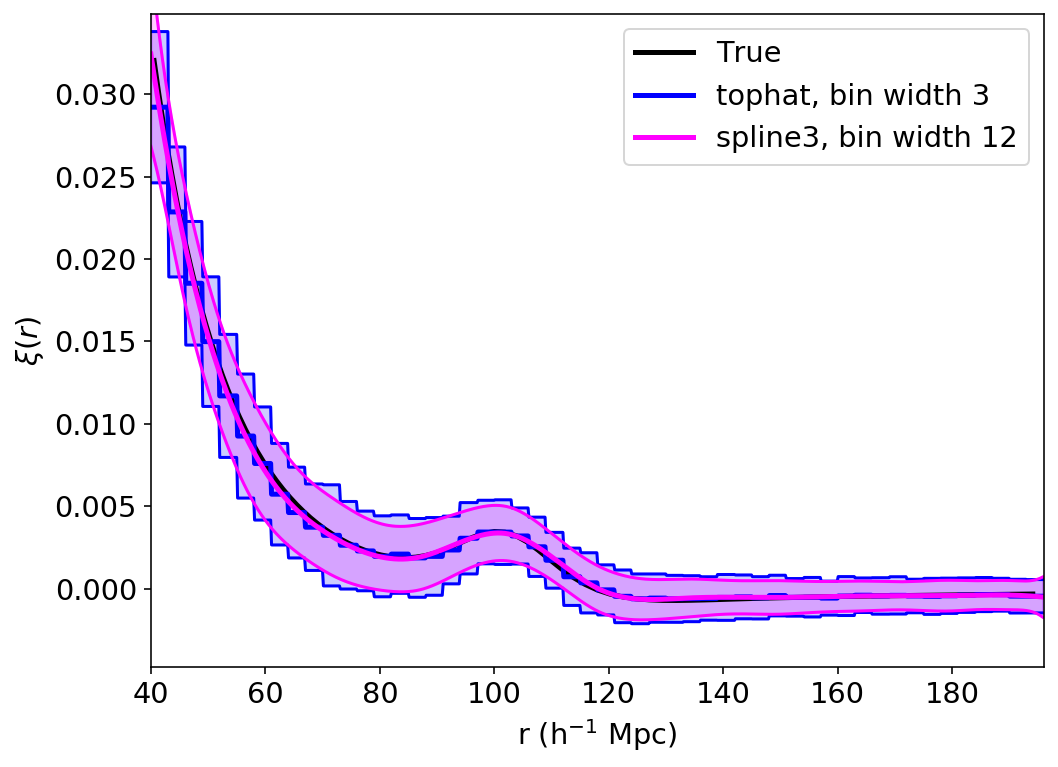

In [25]:
cat_tag = '_L750_n1e-4'
cf_tags = ['_tophat_bw3', '_spline3_bw12']
colors = ['blue', 'magenta']
plot_continuous(cat_tag, cf_tags, colors=colors)

(3, 1000)
rmse: True
plotting


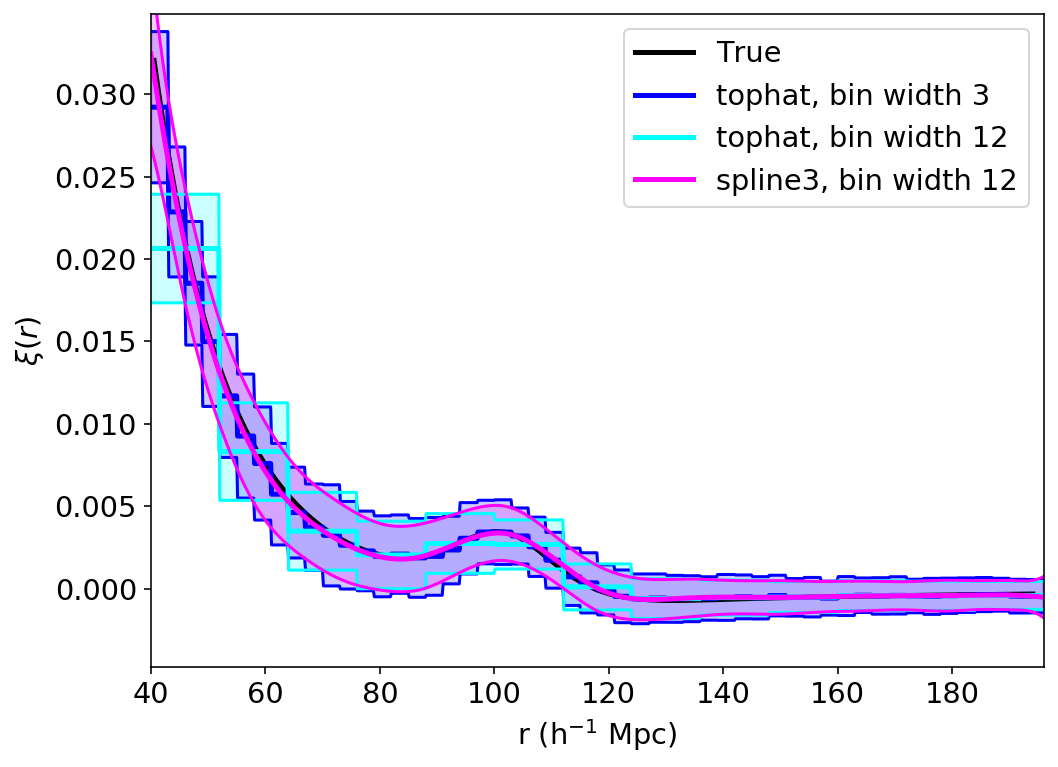

In [32]:
cat_tag = '_L750_n1e-4'
cf_tags = ['_tophat_bw3', '_tophat_bw12', '_spline3_bw12']
colors = ['blue', 'cyan', 'magenta']
plot_continuous(cat_tag, cf_tags, colors=colors)

(4, 100, 1000)
(1000,)
(4, 1000)
rmse: True
plotting
0.0010186 100000.0


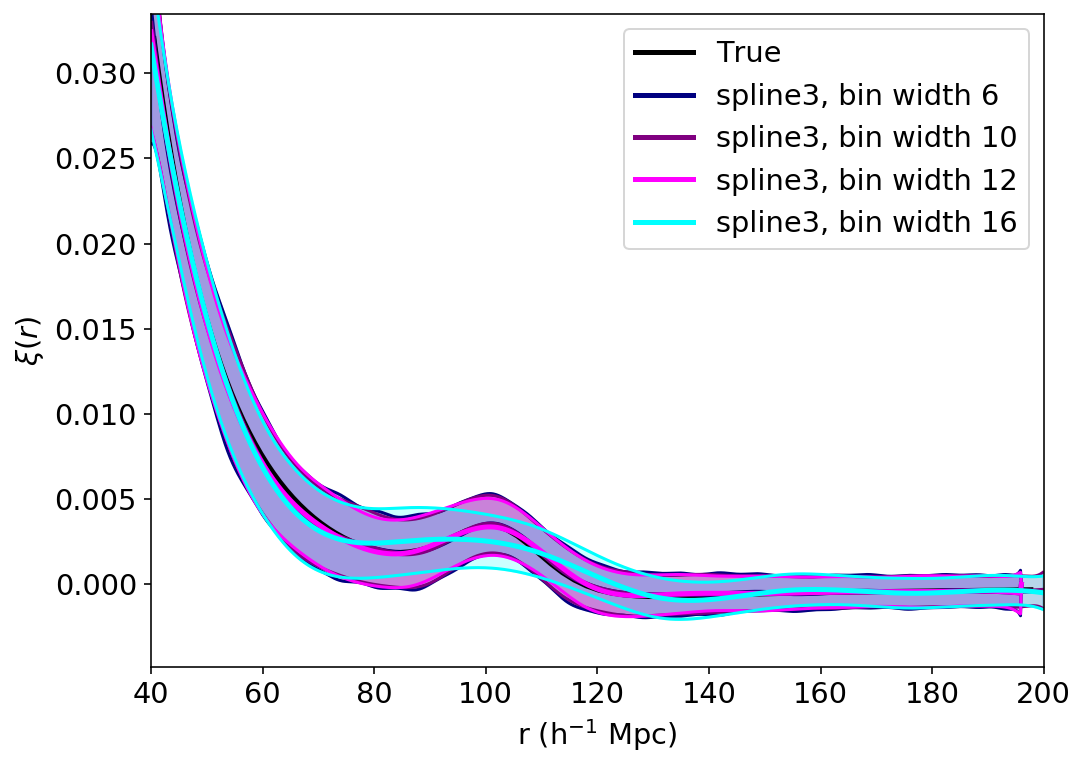

In [39]:
cat_tag = '_L750_n1e-4'
cf_tags = ['_spline3_bw6', '_spline3_bw10', '_spline3_bw12', '_spline3_bw16']
colors = ['navy', 'purple', 'magenta', 'cyan']
plot_continuous(cat_tag, cf_tags, colors=colors)

(5, 1000)
rmse: True
plotting


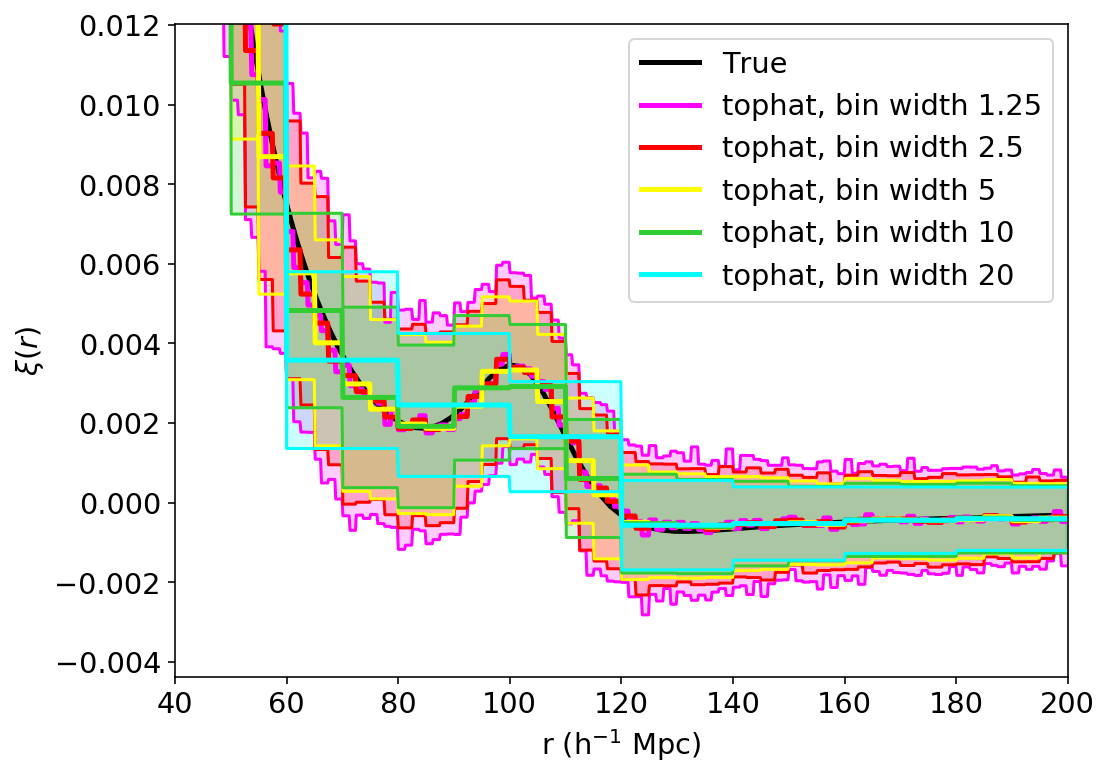

In [17]:
cat_tag = '_L750_n1e-4'
cf_tags = [ '_tophat_bw1.25', '_tophat_bw2.5', '_tophat_bw5', '_tophat_bw10', '_tophat_bw20']
colors = ['magenta', 'red', 'yellow', 'limegreen', 'cyan']
plot_continuous(cat_tags, cf_tags, colors=colors)

### Number density comparison

(2, 1000)
rmse: True
plotting
0.0010186 100000.0


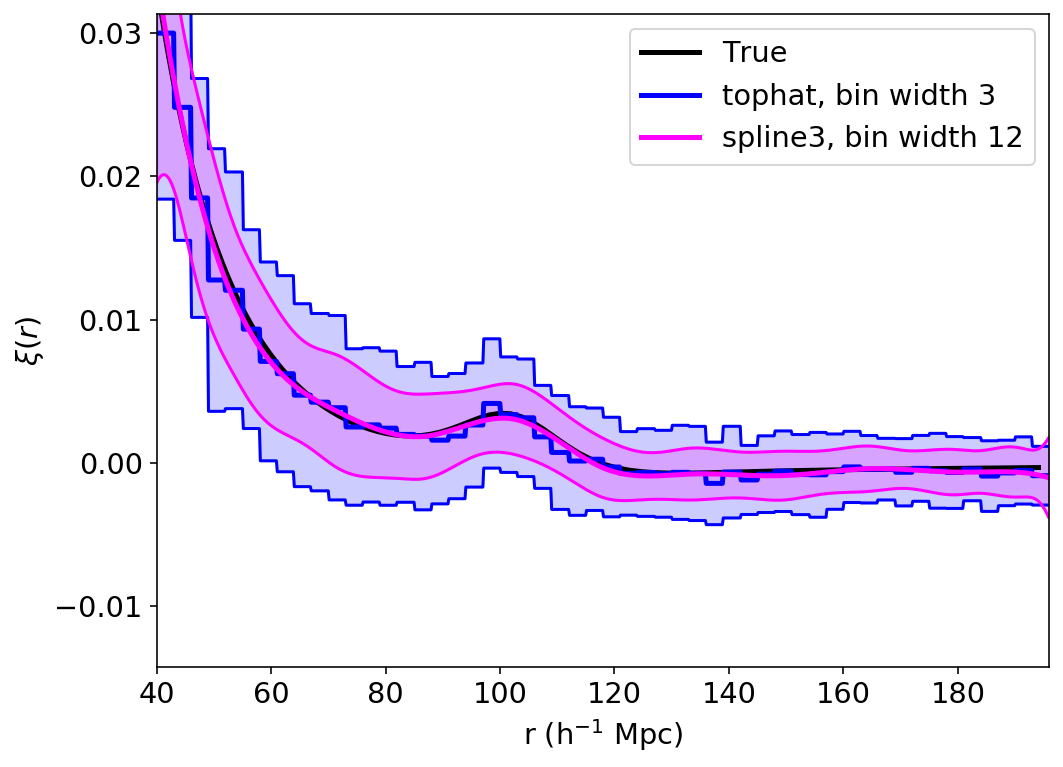

In [52]:
cat_tag = '_L750_n3e-5'
cf_tags = ['_tophat_bw3', '_spline3_bw12']
colors = ['blue', 'magenta']
plot_continuous(cat_tag, cf_tags, colors=colors)

(2, 100, 1000)
(1000,)
(2, 1000)
rmse: True
plotting
0.0010186 100000.0


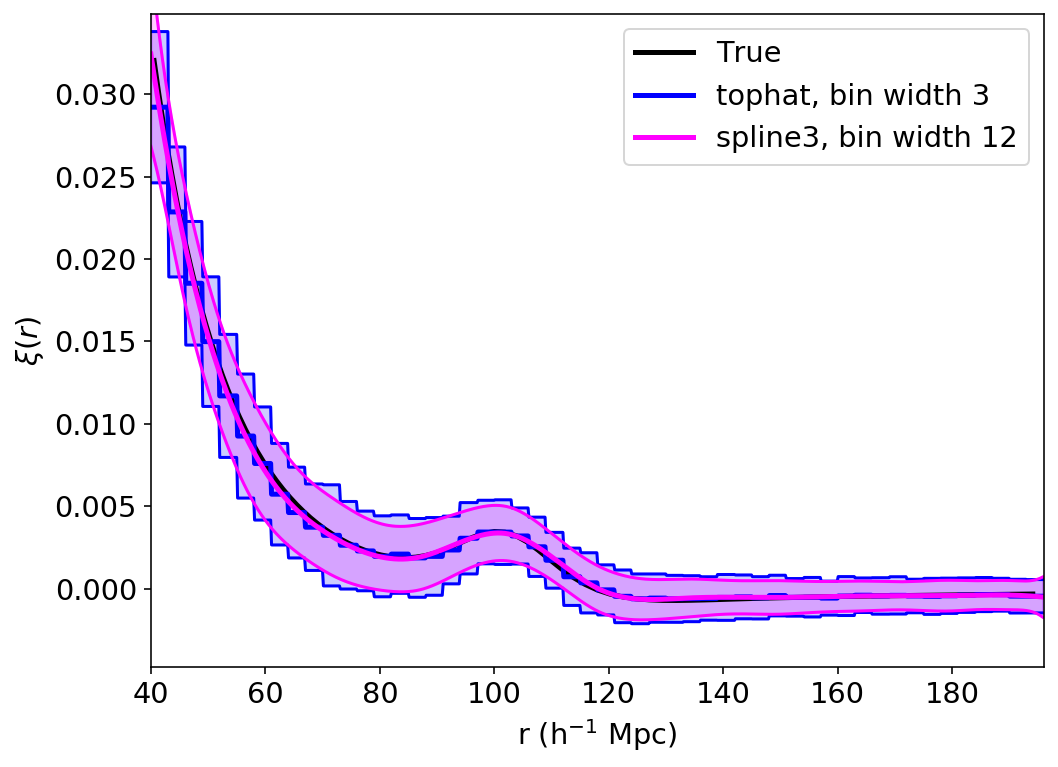

In [40]:
cat_tag = '_L750_n1e-4'
cf_tags = ['_tophat_bw3', '_spline3_bw12']
colors = ['blue', 'magenta']
plot_continuous(cat_tag, cf_tags, colors=colors)

(2, 1000)
rmse: True
plotting
0.0010186 100000.0


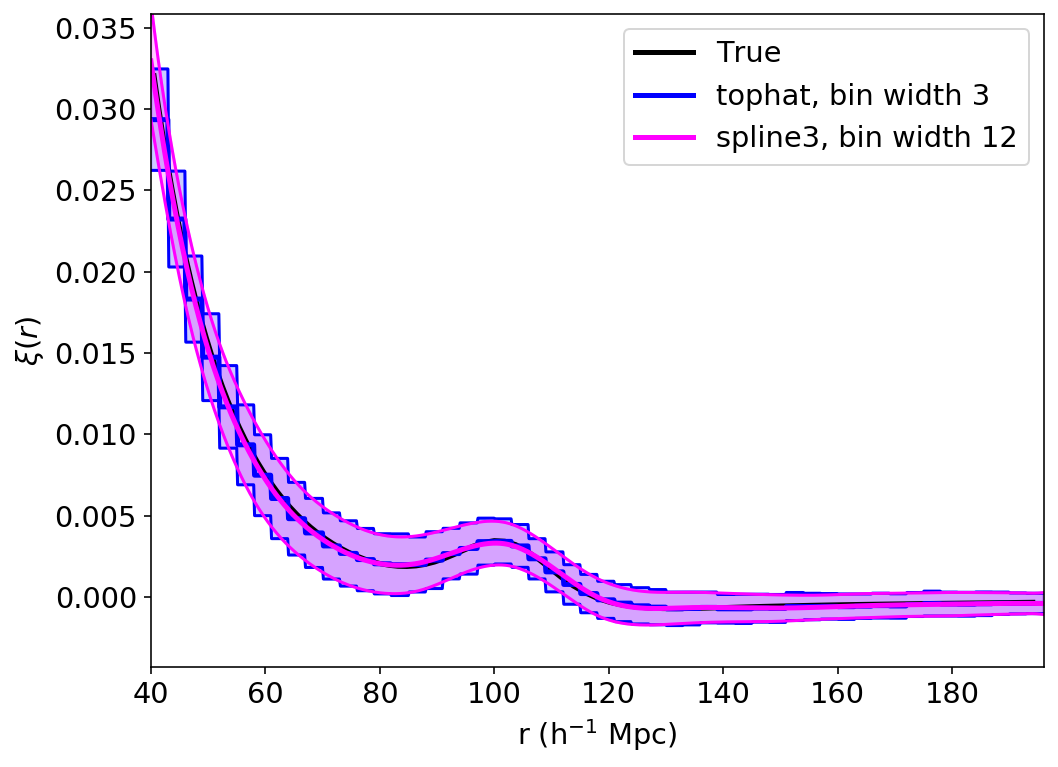

In [50]:
cat_tag = '_L750_n3e-4'
cf_tags = ['_tophat_bw3', '_spline3_bw12']
colors = ['blue', 'magenta']
plot_continuous(cat_tag, cf_tags, colors=colors)